<a href="https://colab.research.google.com/github/lzeng11bc/MLProjectsSKLearn/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training Models
##### Training Linear Regression Models
* ***Closed Form Equation***
  * **Directly computes the model parameters that best fit the model to the training set(i.e., the model parameters that minimize the cost function over the training set.)**
* ***Gradient Descent(GD)***
  * **Gradually tweaks the model parameters to minimize the cost function over the training set, eventually converging to the same set of parameters as the first method**


## Linear Regression
* **A linear model makes a prediction ny simply computing a weighted sum of the input features, plus a constant called the *bias term*(also called an *intercept term*)**

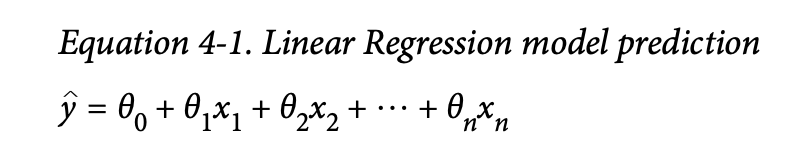

* $\hat{y}$ is tghe predicted value
* $n$ is the number of features
* $x_i$ is the $i^{th}$ feature value
* $\theta_{j}$ is the $j^{th}$ model parameter(including the bias term $\theta_{0}$ iand the feature weights, $\theta_1, \theta_2, \dots,  \theta_n$)

* **This can be written much more concisely using a vectorized form**

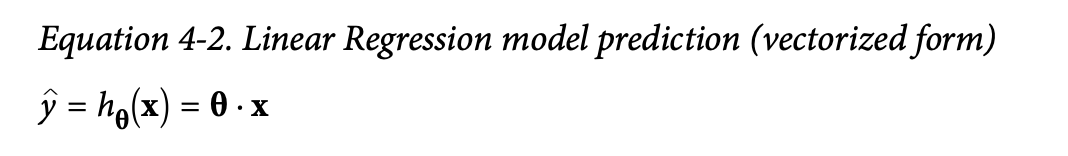

* $\pmb{\theta}$ is the model's *parameter vector*, containing the bias term $\theta_0$ and the feature weights $\theta_1$ to $\theta_n$
* $\pmb{x}$ is the instance's *feature vector*, containg $x_0$ to $x_n$, with $x_0$ always equal to 1.
* $h_{\theta}$ is the hypothesis function, using the model parameters $\pmb{\theta}$

##### Training Linear Regression
* **To train a linear regression model, you need to find the valye of $\pmb{\theta}$ that minimizes the RMSE**
* **The MSE of a Linear Regression hypothesis $h_{\theta}$ on a training set $\pmb{X}$ is calculated using**

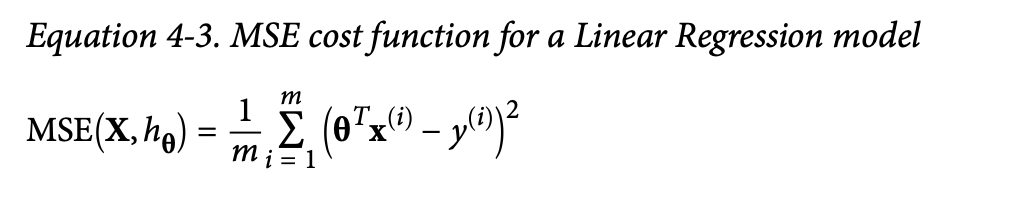

## The Normal Equation
* **To find the value of $\pmb{\theta}$ that minimizes the cost function, there is a *closed-form solution*, in other words, a mathematic equation that gives the result directly. This is called the *Normal Equation***

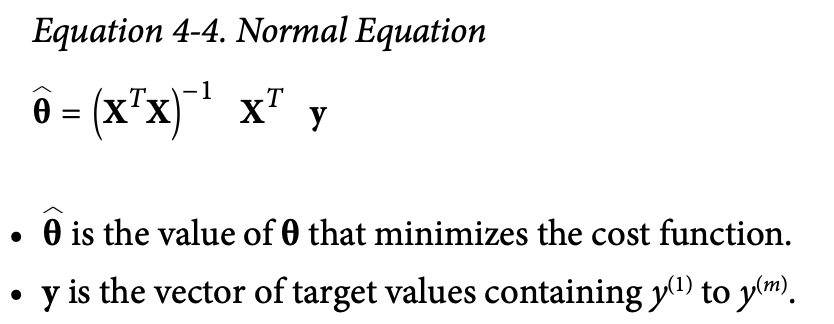

**Generate some liner-looking data to test this equation.**

In [ ]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

* **Now let's compute $\hat{\pmb{\theta}}$ using the Nornal Equation**
* **We will use the** inv( ) **function from Numpy's Linear Algebra module to compute the inverse of a matrix, and the** dot( ) **method for matrix multiplication**

In [ ]:
X_b = np.c_[np.ones((100, 1)), X] #add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
theta_best

array([[4.08017383],
       [2.87827805]])

* **Now we can make predictions using $\hat{\pmb{\theta}}$:**

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.08017383],
       [9.83672993]])

* **Let's plot the model's predictions**

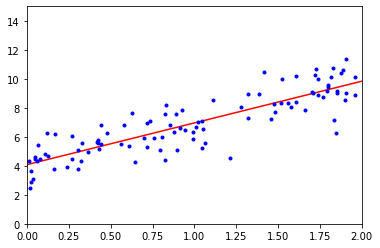

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

* **Perfroming linear regression using Scikit-Learn is quite simple**

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_


(array([4.08017383]), array([[2.87827805]]))

In [ ]:
lin_reg.predict(X_new)

array([[4.08017383],
       [9.83672993]])

* **The** LinearRegression **class is based on the** scipy.linalg.lstsq( ) **function(the name stands for "*least squares*"), which you could call directly**

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.08017383],
       [2.87827805]])

* **The** scipy.linalg.lstsq( ) **function computes** $\hat{\theta} = \pmb{X}^+ \pmb{y}$, **where $\pmb{X}^+$ is the *pseudoinverse* of $\pmb{X}$(specifically the Moore-Penrose inverse**
  * **You can use** no.linalg.pinv( ) **to compute the pseudoinverse directly**

In [ ]:
np.linalg.pinv(X_b).dot(y)

array([[4.08017383],
       [2.87827805]])

* **The pseudoinverse itself is computed using a standard matrix factorization technique called *Singular Vlaue Decompostion*(SVD) that can decompose the training set matrix $\pmb{X}$ intot he matrix multiplicatipn of three matrics $\pmb{U} \quad \pmb{\Sigma} \quad \pmb{U^T}$**

### Computational Complexity
* **The Normal Equation computes the inverse of $\pmb{X}^T \pmb{X}$, which is an $(n + 1) \times (n + 1)$ matrix(where n is the number of features**
* **The *computational complexity* of inverting such a matrix is typically $O(n^{2.4})$ to $O(n^3)$**
* **Once you have trained your Linear Regression model, predictions are very fast: the computational complexity is linear with regards to both the numbr of instances you want to make predictions on and the number of features**

## Gradient Descent
* **The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize the cost function**
* **It measures the local gradient of the error fucntion with regards to the parameter $\pmb{\theta}$, and it goes in the direction of the descending gradient.**
  * **once the gradient is zero, you bave reached a minimum**
* **Concretely, you start by filling $\pmb{\theta}$ with random values(this is called *random initialization*), and then you improve it gradually, taking one step at a tiome, each step attempting to decrease the cost function(e.g., the MSE), until the algorithm *converges* to a minimum**

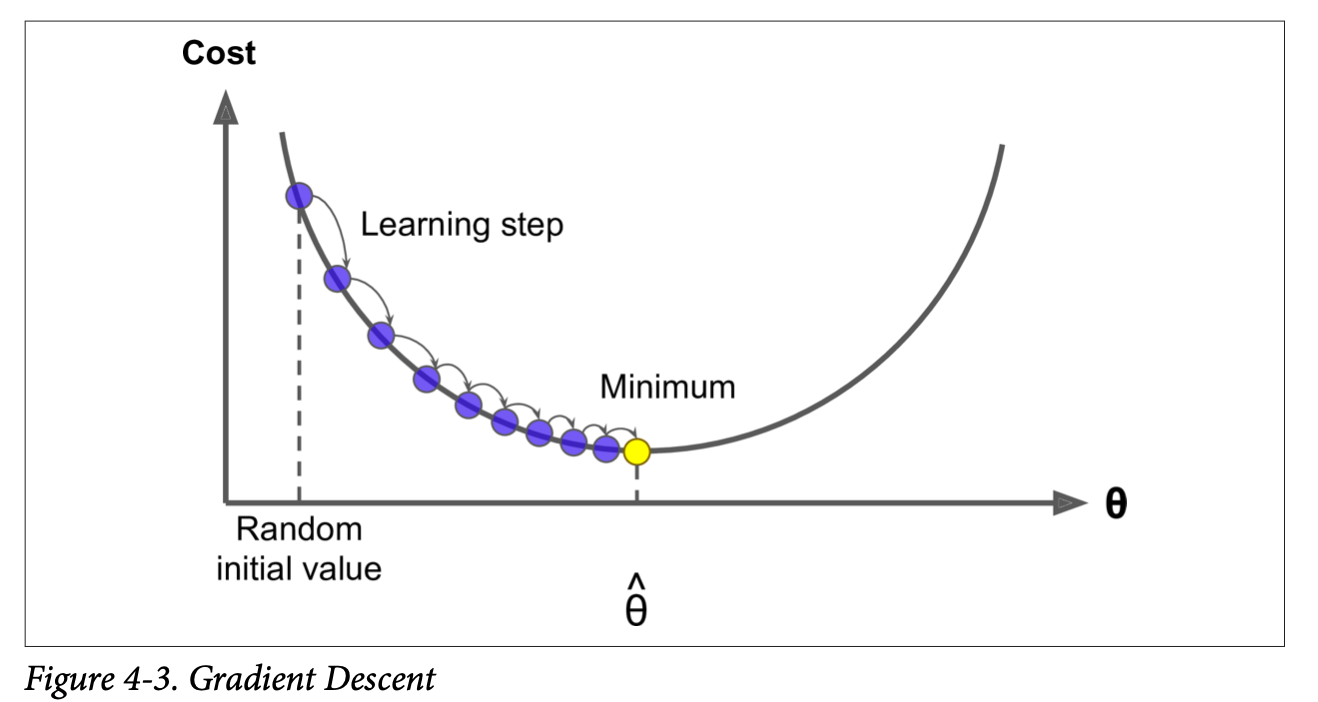

* **An important parameter in Gradient Descent is the size of the steps, determined by *learning rate* hyperparameter.**
  * **If the learing rate is too small, then the algorithm will have to go through many iterations to converg, which will take a long time**
  * **On the other hand, if the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher than you were before. This might make the algorithm diverge, with larger and larger values.**

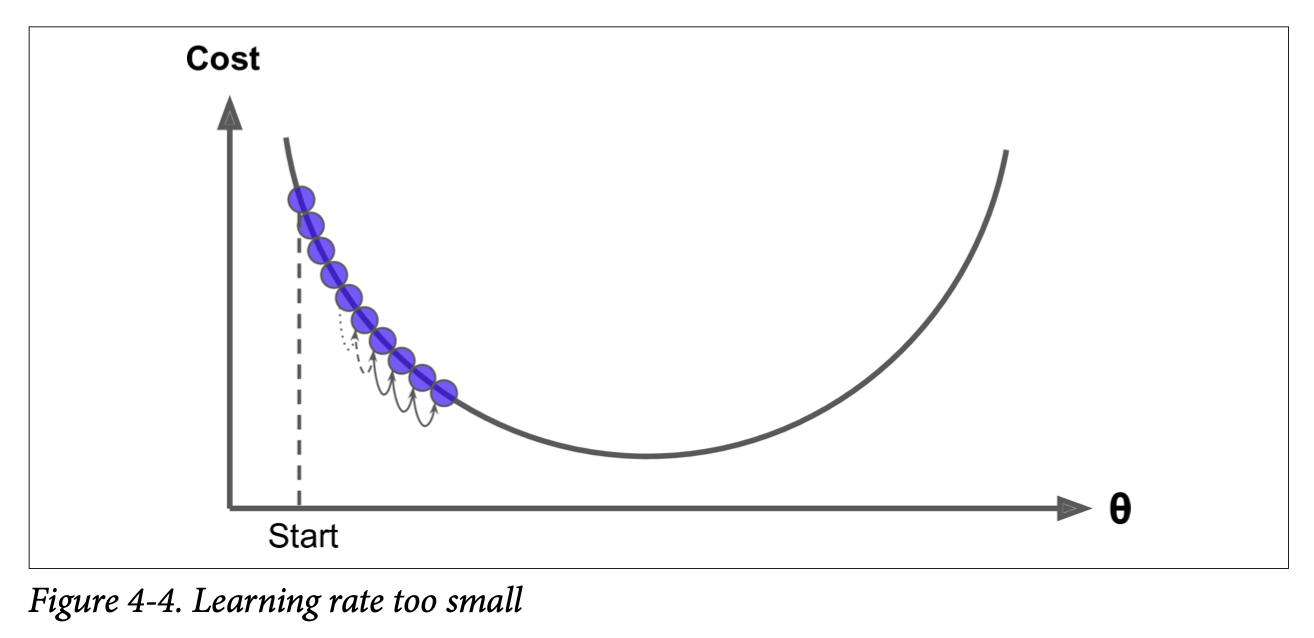

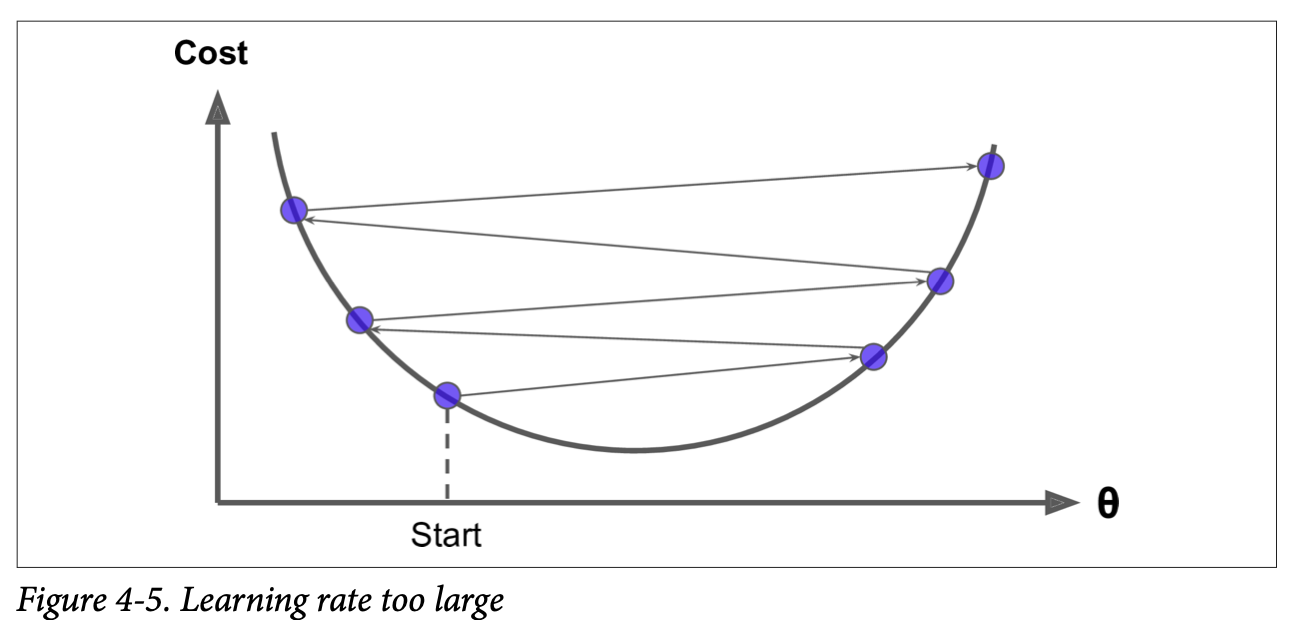

##### Two Main Challenges with Gradient Descent


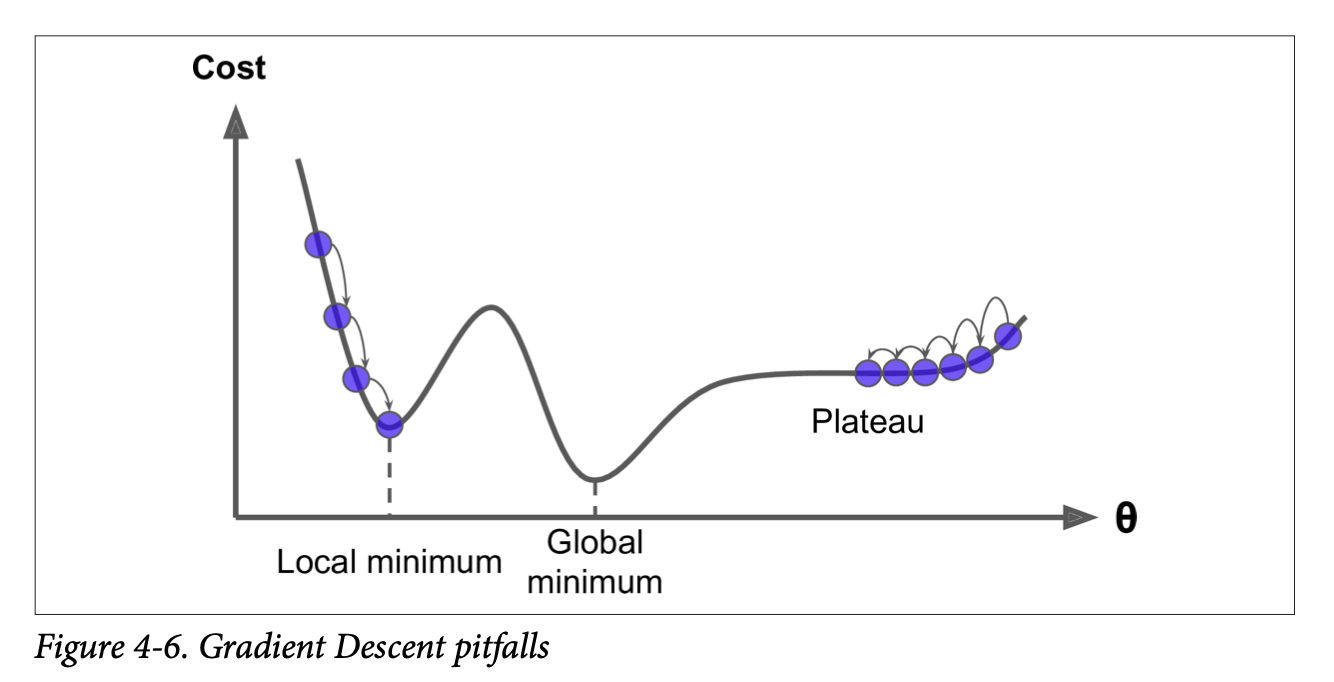

* **If the radom initialization starts the algorithm on the left, then it will converge to a *local minimum*, which is not as good as a *global minimum***
* **If it starts on the right, then it will take a very long time to cross the plateau, and if you stop too early you will never reach the global minimum**
* **MSE cost function for a Linear Regression model happens to a *convex function*, which means that if you pick any two poindt on the curve, the line segment joining them never cross the curve.**
  * **This implies that there are no local minima, just one global minimum**
  * **It is also a continuos function with a slope that never changes abruptly**
  * **Gradient Descent is guaranteed to approach arbitrarily close the global minimum.**

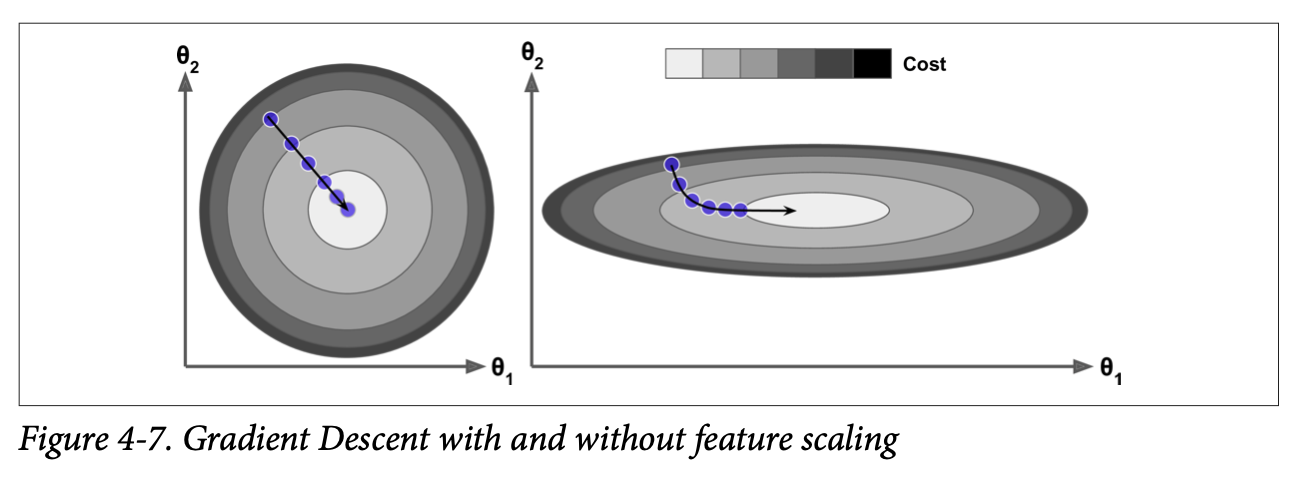

* **The cost fucntion has the shape of a bowel, but it can be an elongated bowl if the features have very different scales**

##### Training
* **This diagram illstrates the fact that training a model means searching for a combination of model parameters that minimizes a cost function(over the training set)**
  * **It is a search in the model's *parameter space*: the more parameters a model has, the more dimensions this space has, and the harder the search is**

### Batch Gradient Descent
* **To implenet Gradient Descent, you need to compute the gradient of the cost function with regards to each model parameter $\theta_{j}$.**
  * ***partial derivative*: You need to calculate how much the cost function will change if you change $\theta_j$ justa bit**
* **Equation computes the partial derivative of the cost function with regards to parameter $\theta_j$, noted $\frac{\partial}{\partial \theta_j}MSE(\pmb{\theta})$**
$$\frac{\partial}{\partial \theta_j}MSE(\pmb{\theta}) = \frac{2}{m} (\pmb{\theta}^{T} \pmb{x}^{(i)} - y^{(i)}) x_j^{(i)}$$

* **Instead of computing these partial derivatives individuallhy, you can compute them all in one go**

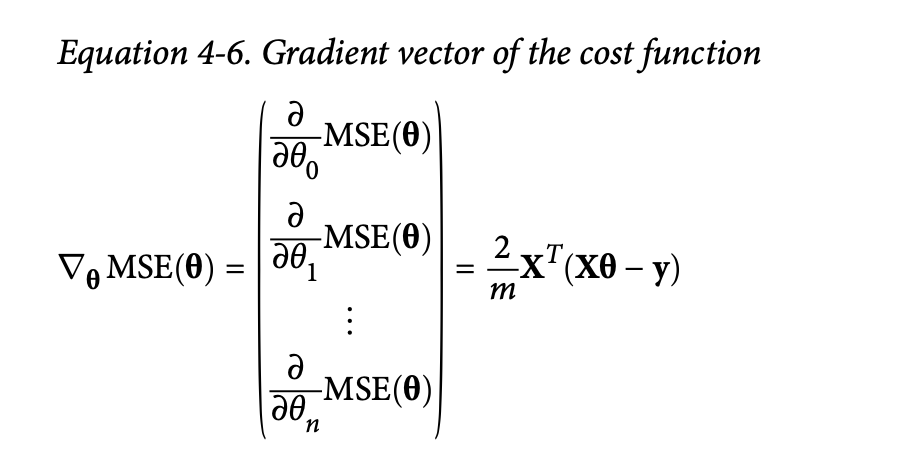

* **Once you have the gradient vector, which points uphill, just go in the opposite direction to go downhill.**
  * **This means subtracting $\nabla MSE(\pmb{\theta})$ from $\theta$. This is where the lear ing rate $\eta$ copmes into play: multiplying the gradient vector by $\eta$ determin the size of the downhill step**


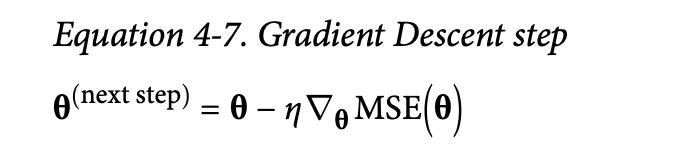

* **Let's look at a quick implementation of this algorithm**

In [ ]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) #radom initialization

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [ ]:
theta

array([[4.08017383],
       [2.87827805]])

**Following figure shows the first 10 stpes of Gradient Descent using three different learning rtes(the dashed line represents the starting point)**

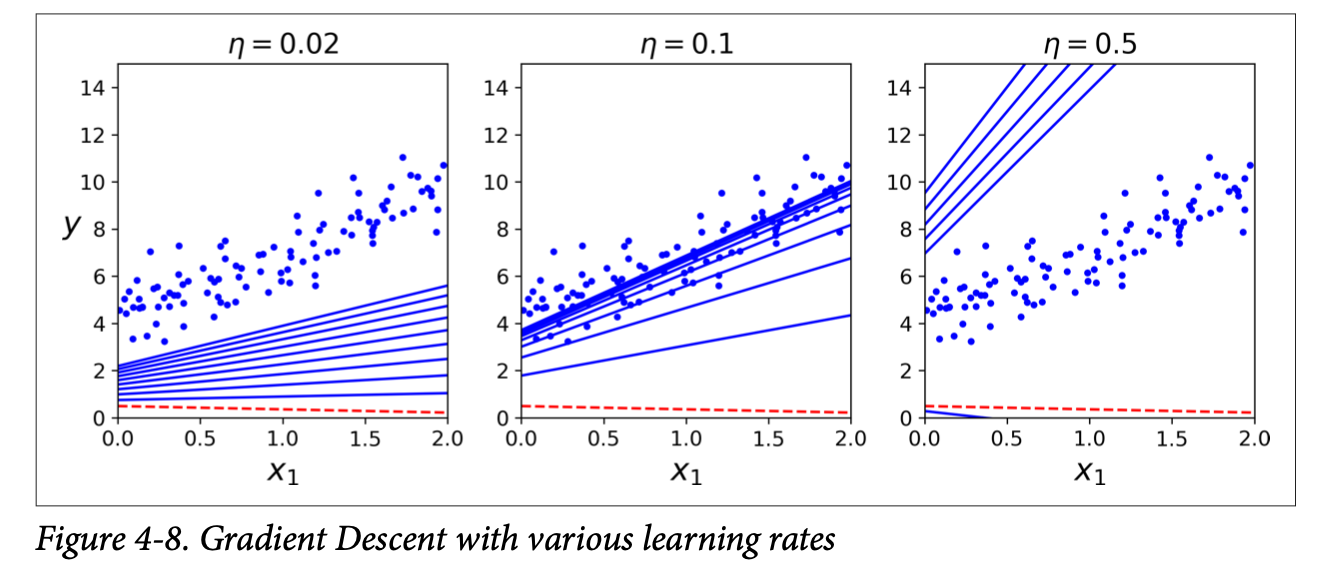

* **On the left, the leraning rate is too low: the algorithm will eventually reach the solution, but it will take a long time.**
* **In the middle, the learning rate looks pretty good: in just a few iterations, it has already converged to the solution.**
* **On the right, the learning rate is too high: the algorithm diverges, jumping all over the place and actually getting futher and further away from the solution at every step.**

##### Convergence Rate
* **When the cost function is convex and its slope does not change abruptly(as is the case for the MSE cost function), Batch Gradient Descent with a fixed learning rate will eventually converge to the optimal solution, but you may have to wait a while: it can take $O(\frac{1}{\epsilon}))$ iterations to reach the optimum within a range of $\epsilon$ depending on the shape of the cost function.**


### Stoachstic Gradient Descent
* **The main problem with Batch Gradient Descent is the fact that it uses the whole training set to ciompute the gradients at every step, which makes it very slow when the training set is large.**
* **At the opposite extreme, *Stochastic Gradient Descent* just picks a random instance in the training set at every step and computes the gradients based only on that single instance**

###### Advantage
* **This makes the it possible to train on huge training sets, since only one instance needs to be in memory at each iterations

##### Disadvantage
* **Due to its stochastic nature, this algorithm is much less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on avergae.**
* **Over time it will end up every close to the minimum, but once it gets there it will continue to bounce around, never settling down. So once the algorithm stops, the final parameter values are good, but not optimal.**

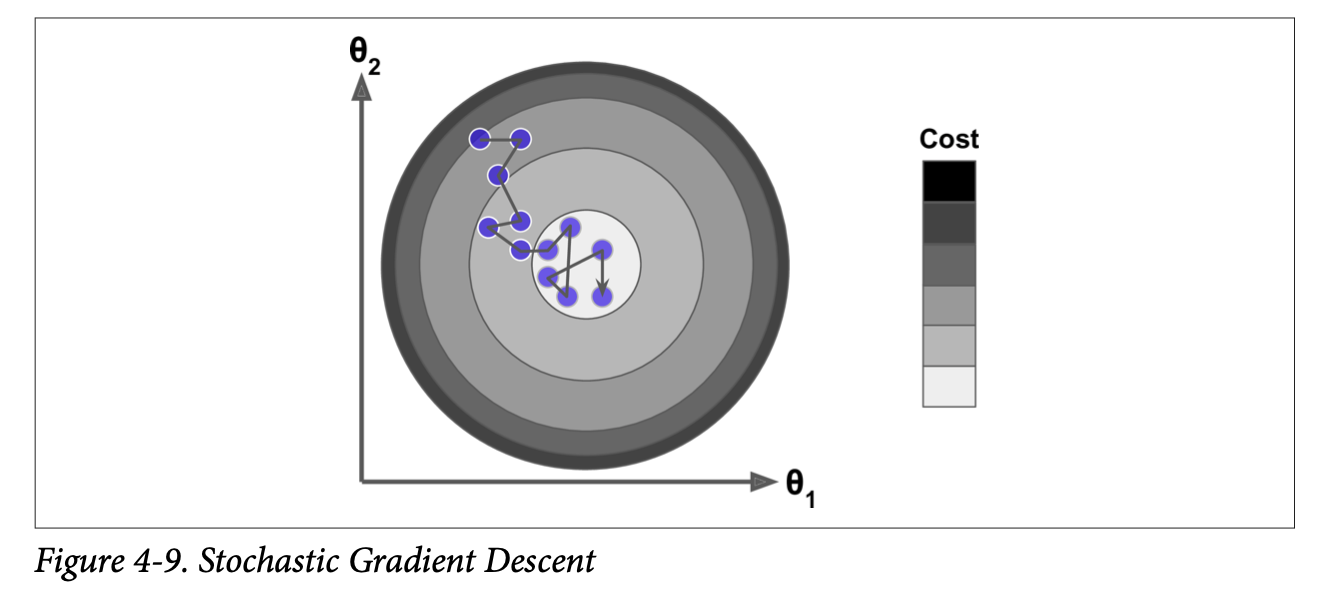

**Randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum.**
  * **One solution to this is to gradually reduce the learning rate. The steps start out large, then get smaller and smaller, allowing the algorithm to settle at the global minimum**
* **The function that determines the learning rate at each iteration is called the *learning schedule*.**
  * **If the leraning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum.**
  * **If the learning rate is reduced too slowly, you may jump around the minimum for a long time and  end up with suboptimial solution if you halt training too early.**

**Implements Stochastic Gradient Descent using a simple learning schedule**1

In [ ]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2, 1) # radnom initialization

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

* **By convention we iterate by rounds of *m* iterations;each round is called an *epoch***
* **While the Batch Gradient Descent goes through the whole training set, this code goes through the trianing set only 50 time and reaches a farily good solution**


In [ ]:
theta

array([[4.072253 ],
       [2.8818772]])

**Following figure shows the first 20 steps of training**

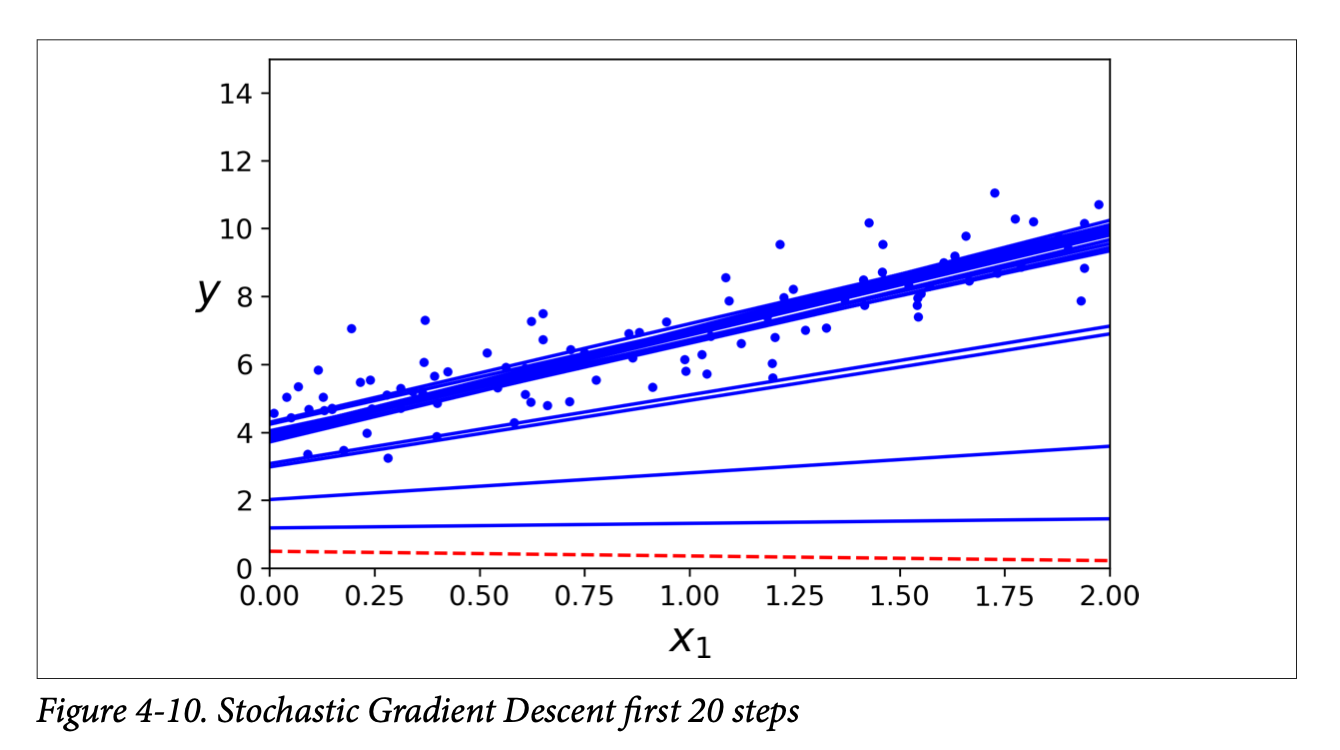

* **Note that since instance may be picked several times per epoch while others may not be picked at all.**

* **TO perform linear regression using SGD with Scikit-Learn, you can use the** SGDRegressor **class, which defaults to optimizing the squared error cost function**<br>

**The following code runs for maximum 1000 epochs(** max\_iter=1000 **)or until the loss drops by less than** 1e-3 **during one epoch(** tol=1e-3 **), starting with a learning rate of** 0.1 (eta=0.1)

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.89670253]), array([2.81985405]))

### Mini-batch Gradient Descent
* **At each step, instead of computing the gradients ased on the full training set(as in Batch GD) or based on just one instance(as in stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called *Mini-batches***

##### Advantages
* **The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs**


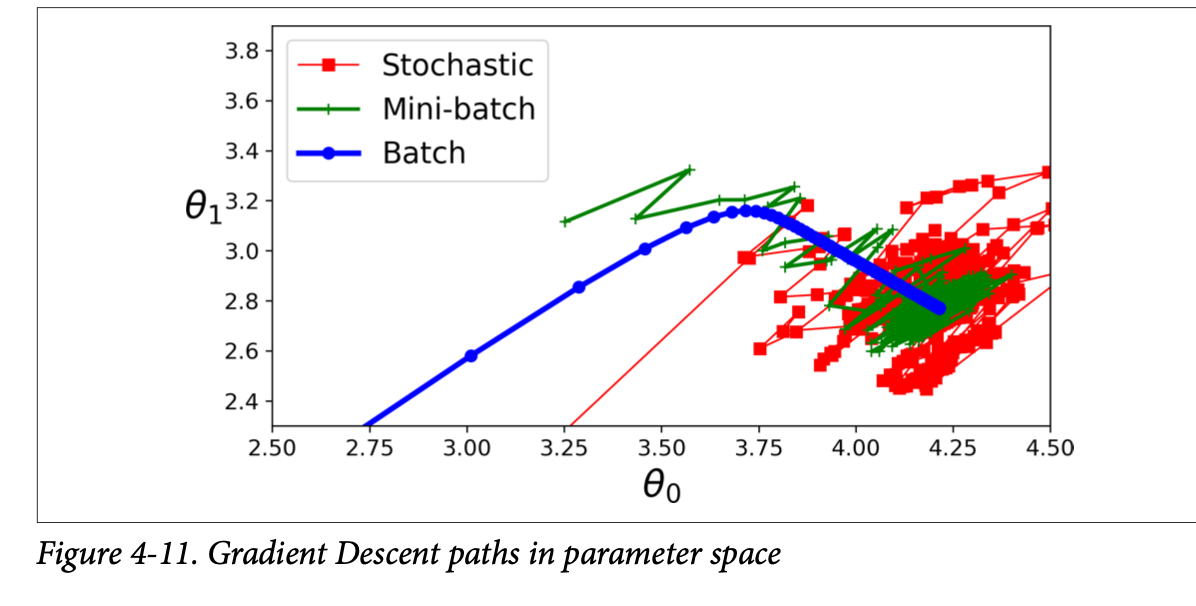

* **The algorithm's progress in parameter space is less erratic with SGD, especially with a fairly large number of mini-batches.**
    * **As a result, Mini-batch GD will end up walking around a bit closer to the minimum than SG.**
    * **On the other hand, it may be harder for it to escape from local minimum.**


**A quick comparison for the algorithms we've discusees so far for Linear Regression**

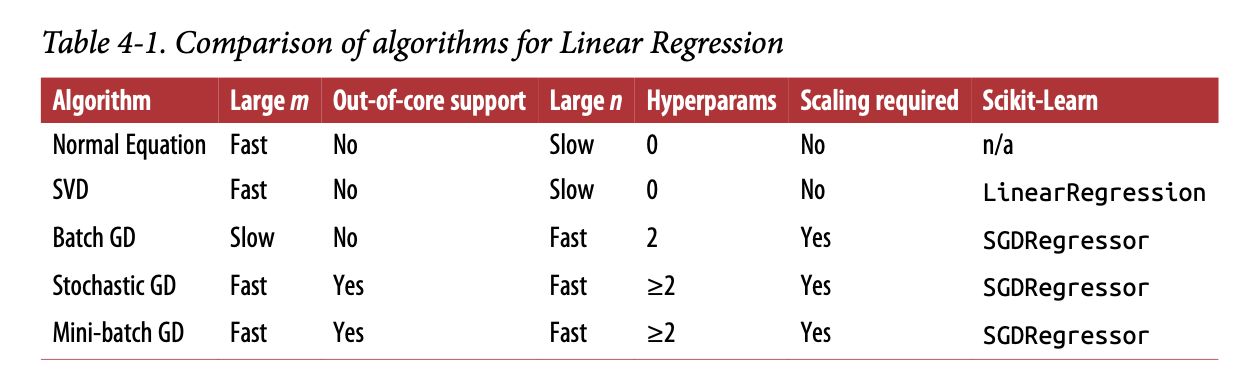

## Polynomial Regression
* **You can actually use a linear model to fit nonlinear data.**
* **A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features.**
    * **This technique is called *Polynomial Regression***

**A quick example**

In [25]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

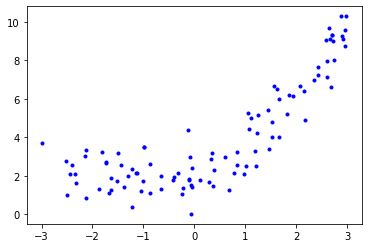

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X, y, 'b.')
plt.show()

* **A straight line will never fit this data properly. We can use SK-Learn's** PolynomialFeatures **class to transform our training data, adding the sqaure($2^{nd}$ degree polynomial) of each feature in the training set as new features**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-1.4963914])

In [ ]:
X_poly[0]

array([-1.4963914 ,  2.23918723])

X\_poly **now contains the original feature of** X **plus the square of this feature**<br>
**Now you can fit a** LinearRegression **model to this extended training data**

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.10040672]), array([[1.00183425, 0.5092996 ]]))

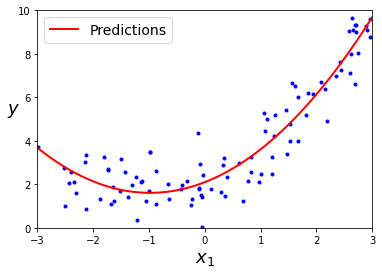

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

* **Note that when there are multiple features, Polynomial Regression is capable of finding relationships between features(which s something a plain Linear Regression model cannot do)**
    * **This is made possible by the fact that** PolynomialFeatrues **also adds all combinations of features up to the given degree.**
* PolynomialFeatures(degree=d) **transforms an array containing *n* features into an array containing $\frac{(n+d)!}{d!n!}$ features, where $n!$ is the *factorial* of n, equal to 1 x 2 x 3 x $\dots$ n.**

### Learning Curves
* **Another way is to look at the *learning curves*: these are plots of the model's performance on the training set and the vaidation set as a function of the training set size(or the trianing iteration).**
* **To generate the plots, simply train the model several times on different sized subsets of the training set**

**The following code defines a function that plots the learning curves of a model given some training data**

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)

**We can look at the learning curves of the plain Linear Regression model**

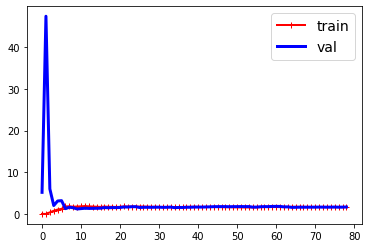

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

* **When there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero.**
* **As new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, bot becuase the data is noisy and because realtion is not linear, so the error on the training set goes up until it reaches a plaueau, at which point adding new instances to the training set doesn't make the average error much better or wose.**
* **Let's look at the performance of the model on the validation data. When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is intially quite big.**
    * **As the model is shown more training examples, it learns and thus validation error slowly goes down.**
    * **A straight line cannot do a good job modeling the data, so the error ends up at a plateau, very close to the other curve**

**Let's look at the learning curves of a $10^{th}$-dgree polynomial model on the same data:**

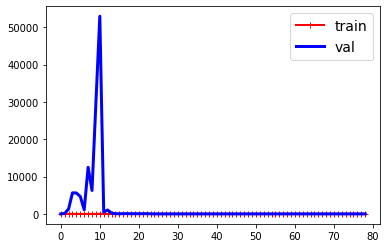

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
                                  ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                                  ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

**The learning curves are different from the previous ones**<br>
* **The error on the training set is much lower than with the Linear Regression**
* **There is a gap between the curves. This means that the model performs significantly better on the training set than on the valdation data, which is the hallmark of an overfitting model.**
    * **If you used a much larger training set, the two curves would continue to get closer**


##### The Bias/Variance Tradeoff
* **An important theorectical result of statistics and Machine Learning is the fact that a model's generalizatio error can be expressed as the sum of three very different errors:**
* ***Bias***:
    * **This is the generalization error due to wrong assumptions, such as assuming that the data is linear when it is actually quadracti. A high-bias model is most likely to underfit the data**
* **Variance***:
    * **This part is due to the model's excessive sensitivity to small variations in the training data. A model with many degrees of freedom is likely to have high variance, and thus to overfit the training data**
* ***Irreducible error***:
    * **This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data.**

## Regularized Linear Models
* **A good way to reduce overfitting is to regulrize the model(i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data**
* **For a linear model, regularization is typically achieved by constraining the weights of the model.**
    * **We will now look at Ridge Regression, Lasso Regression, and Elastic Net, which implement three different ways to constrain the weights**

### Ridge Regression
* **Ridge regression is a regularized version of Linear Regression: a *regularization term* equal to $\alpha \sum_{i=1}^{n} \theta_{i}^2$ is added to the cost function**
* **This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible**<br>
***The regularization term should only be added to the cost function during training.  Once the model is trained, you want to evaluate the model's performance using the unregularized performance measure**
* **The hyperparameter $\alpha$ controls how much you want to regularize the model.**
    * **If $\alpha=0$ then Ridge Regression is just Linear Regression.**
    * **If $\alpha$ is very large, then all weights end up very close to zero and the result is a flat line going through the data's mean**



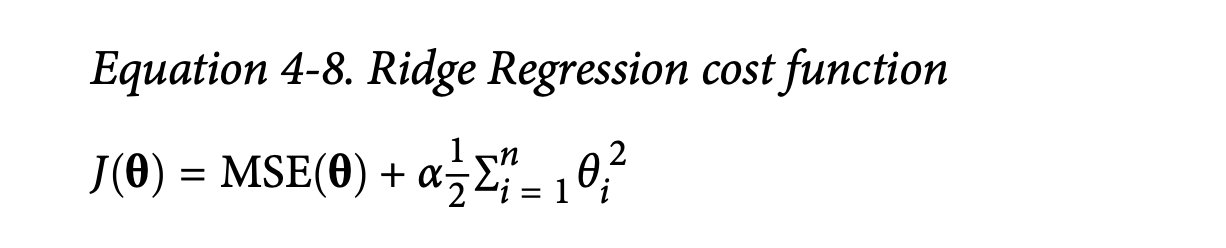

* **Note that thew bias term $\theta_0$ is not regularizedZ(the sum starts at $i=1$,not 0).**
* **If we define $\pmb{w}$ as the vector of feature weights($\theta_1$ to $\theta_n$), the the regularization term is simply equal to $ \frac{1}{2} ( \parallel \pmb{w} \parallel_2)^2$, where $\parallel \pmb{w} \parallel_2$ represents the $\mathcal{l}_2$ norm of the weight vector**
    * **For Gradient Descent, just add $\alpha \pmb{w}$ to the MSE gradient vector**
    * **It is important to scale the data(e.g., using** StandardScaler **before performing Ridge Regression, as it is sensitive to the scale of the input features**

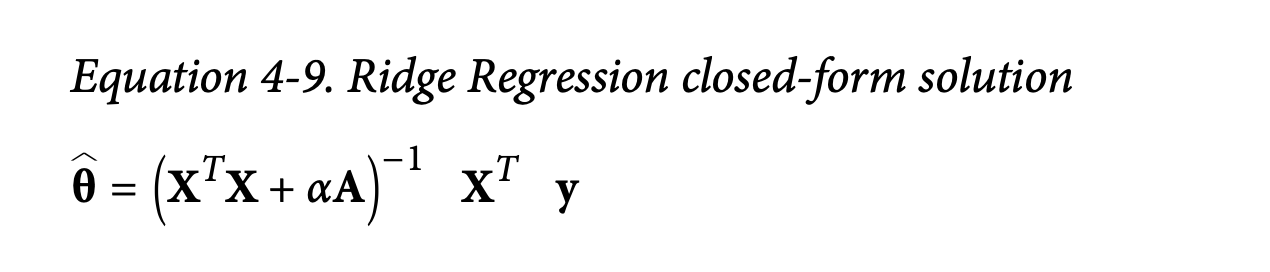

$\pmb{A}$ is the $(n +1) \times (n+1)$ *identity matrix* except with a 0 in the top-left cell, corresponding to the bias term

* **Here is how to perform Ridge Regresion with Scikit-Learn using a closed-form solution**

In [26]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

In [27]:
ridge_reg.predict([[1.5]])

array([[5.27883373]])

**Using Stochastic Gradient Descent**

In [28]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.25657799])

* **The** penalty **hyperparameter sets the type of regularization term to use**
* **Specifying** "l2" **indicates you want SGD to add a regularization term to the cost function equal to half square of the $\mathcal{l}_2$ norm of the weight vector**

### Lasso Regression
* ***Least Absolute Shrinkage and Selection Operator Regression*(simply called *Lasso Regression*) is another regularized version of linear regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the $\mathcal{l}_1$ norm of the weight vector instead of hald the square of the $\mathcal{l}_2$ norm**

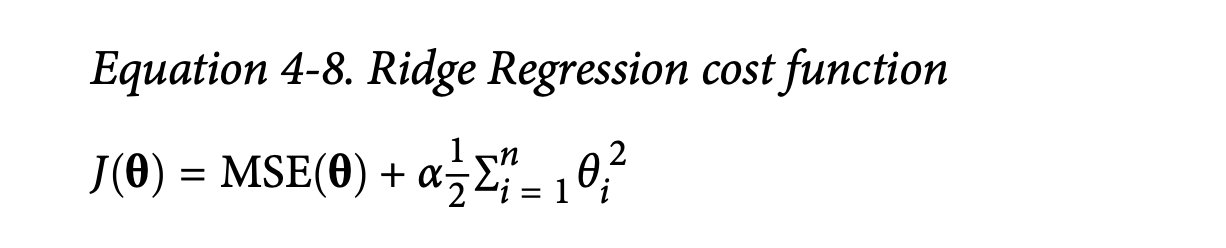

* **An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important features(i.e., set them to zero).**
    * **In otehr words, Lasso Regression automatically performs feature selection and outputs a *sparse model***

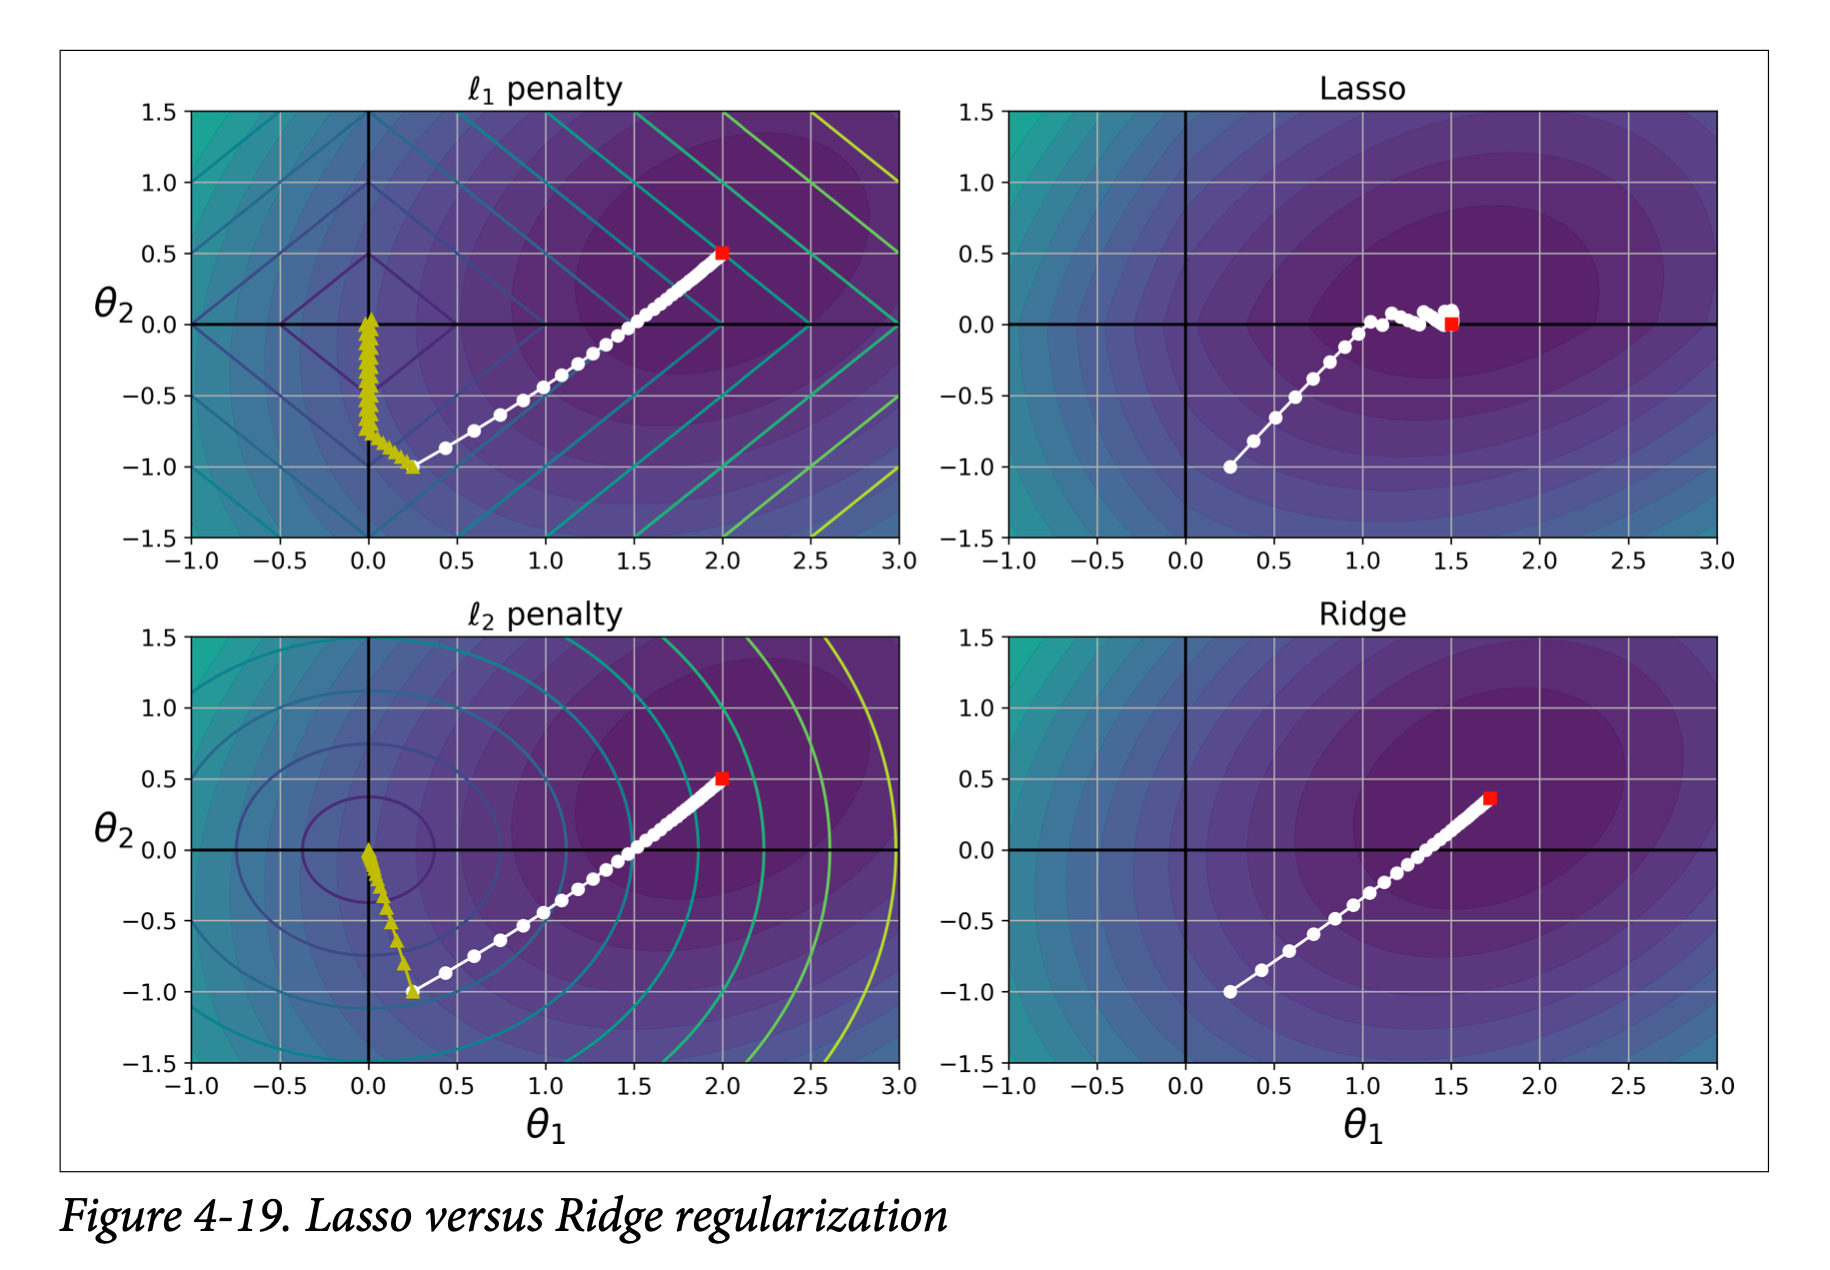

* **On the top-left plot, the background contours (ellipses) represent an unregulairzed MSE cost function($\alpha=0$), and the white circles shos the Batch Gradient Descen path with that cost function**
* **The foreground contours(diamonds) represent the $\mathcal{l}_1$ penalty,and the triangles show the BGD path for this penalty only($\alpha \to \infty$)**
    * **Notice how the path first reaches $\theta_1 = 0$, then rolls down a gutter until it reaches $\theta_2 = 0$.**
* **On the top-right plot, the contour represent the same cost function plus an $\mathcal{l}_1$ penalty with $\alpha=0.5$.**
    * **The global minimum is on the $\theta_2 = 0$ axis**
* **BGD first teaches $\theta_2=0$, then rolls down the gutter until it reaches the global minimum**
* **The regularized minimum is closer to** $\pmb{\theta} = \pmb{0}$ **than the unregularized minimum, but the weights do not get fully eliminated**

* **The Lasso cost function is not differentiable at $\theta_i =0$(for $i =1, 2, \dots, n)$, but Gradient Descent still works fine if you use a *subgradient vector* $\pmb{g}$ instead when any $\theta_i =0$**


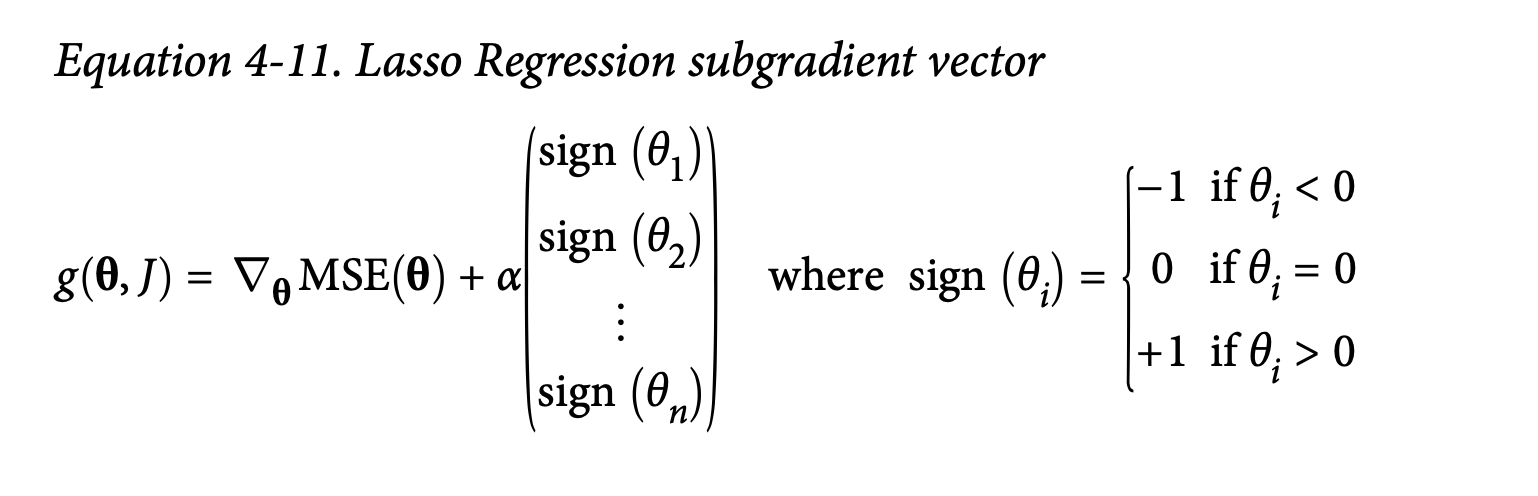

**Here is a small SK-Lean example using the** Lasso **class. Note you could instead use an SGDRegressor(penalty="l1")**

In [29]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.23959265])

### Elastic Net
* **Elastic Net is a middle ground between Ridge Regression and Lasso Regression.**
* **The regularization term is a simple mix of both Ridge and Lasso's regularization terms, and you can control the mix ratio r**
* **When $r=0$, Elastic Net is equivalent to Ridge Regression, when $r=1$, it is equivalent to Lasso Regression**

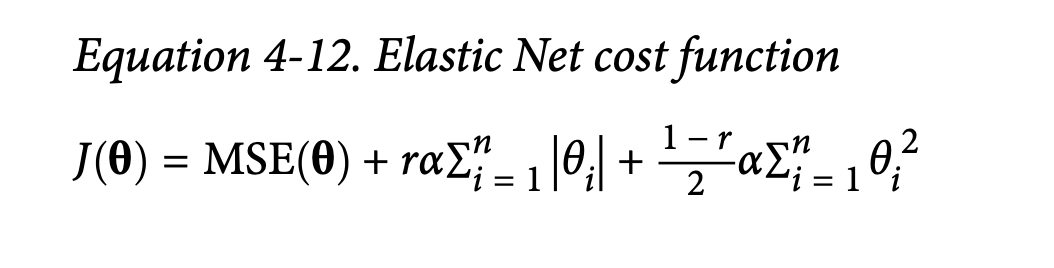

* **So when should you use plain Linear Regression(i.e., without any regularization), Ridge, Lasso, or Elastic Net**
    * **It is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression.**
    * **Ridge is a good default**
    * **If you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless feature's weights down to zero**
    * **In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the numbr of features is greater than the number of training instances or when several features are strongly correlated**


**Here is a short example using SK-Learn's** ElasticNet(l1\_ratio **corresponds to the mix ratio** r)

In [30]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.23739816])

### Early Stopping
* **A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called *early stopping***
* **With early stopping you just stop training as soon as the validation error reaches the minimum.**

***Implementing early stopping***

In [ ]:
from sklearn.base import clone

# prepare the data 
poly_scaler = Pipeline([
                        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
                        ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scale.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, 
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch 
        best_model = clone(sgd_reg)


**Note that with** warm\_start=True, **when the** fit( ) **method is called, it just continues training where it left off instead of restarting from scratch**

### Logistic Regression
* ***Losgistic Regression* is commonly used to estimate the probability that an instance belongs to a particular class**

#### Estimating Probabilities
* **Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features(plus a bias term), but instead of outputing the result directly like the Linear Regression model does, it outputs the logistic of this result**

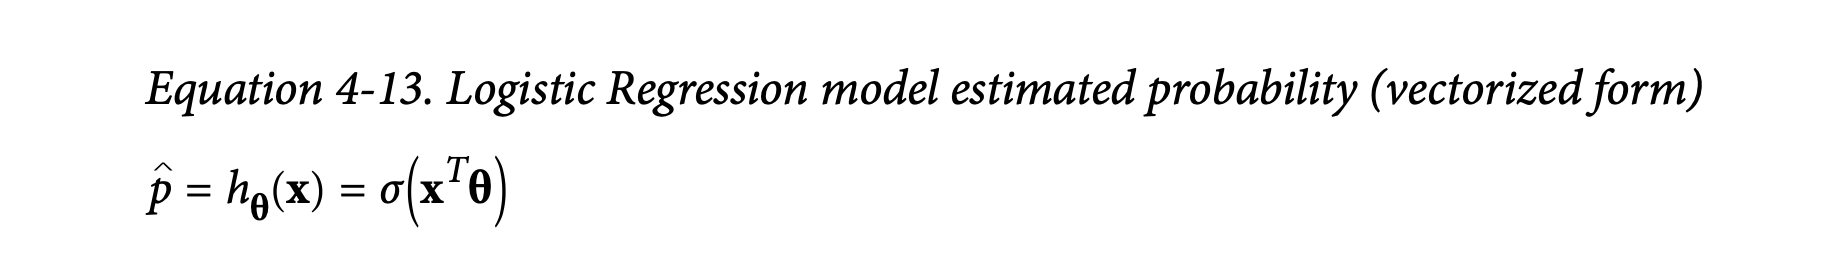

* **The logistic-noted $\sigma(.)$ is sigmoid function that outputs a number between 0 and 1.**
* **it is defined below**

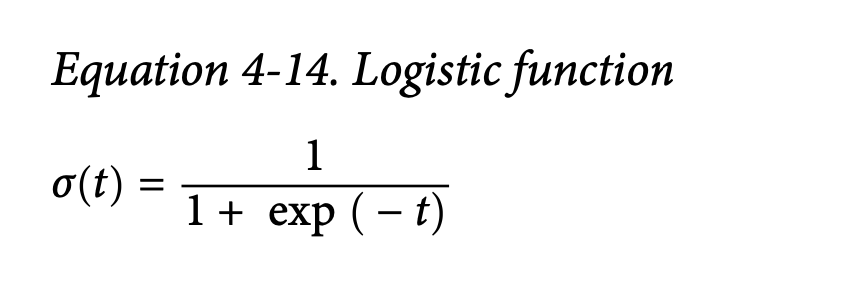

* **Once the logistic model has estimated the probability $\hat{p} = h_\theta (\pmb{x})$ that an instance $\pmb{x}$ belongs to the positive class, it can make its prediction $\hat{y}$ easily**

* **The score t is called the *logit*: this name comes from the fact that the logit function, defined as** logit(p) = log(\frac{(p)}{(1-p)}), is the inverse of the logistic function.**
* **If you compute the logit of the estimated probability $p$, you will find that the result is $t$.**
* **The logit is also called the *log-odds*, since it is the log of the ratio between the estimated probability for the positive class and the estimated probability for the negative class**

### Training and Cost Function
* **The objective of training is to set the parameter vector $\pmb{\theta}$ so that the model estimates high probabilities for positive instances and low probabilities for negative instances.**
* **The idea is captured by the cost function for a single training instance $\pmb{x}$**

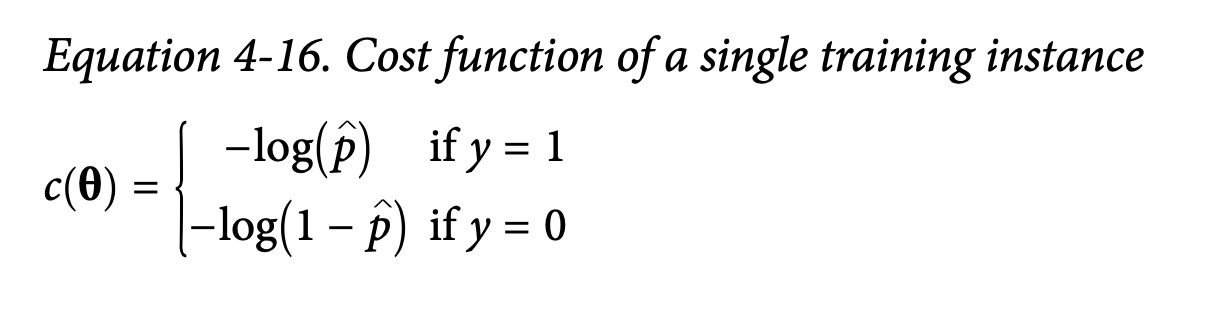

* **The cost function makes sense because $-\log(t)$ grows very large when $t$ approaches 0, so the cost will be large if the model estimates a probability close to 0 for a positive instance, and it will be very large if the model estimates a probability close to 1 for a negative instance.**
* $-\log(t)$ **is close to $0$ for a negative instance or close to $1$ for a positive instance**

* **The bad news is that there is no known closed-form equation to compute the value of $\pmb{\theta}$ that minimizes the cost function**
* **The good news is that this cost function is convex, so Gradient Descent is guaranteed to find the global minimum.**
    * **The partial derivatives of the cost function with regards to the $j^{th}$ model parameter $\theta_j$ is given by**

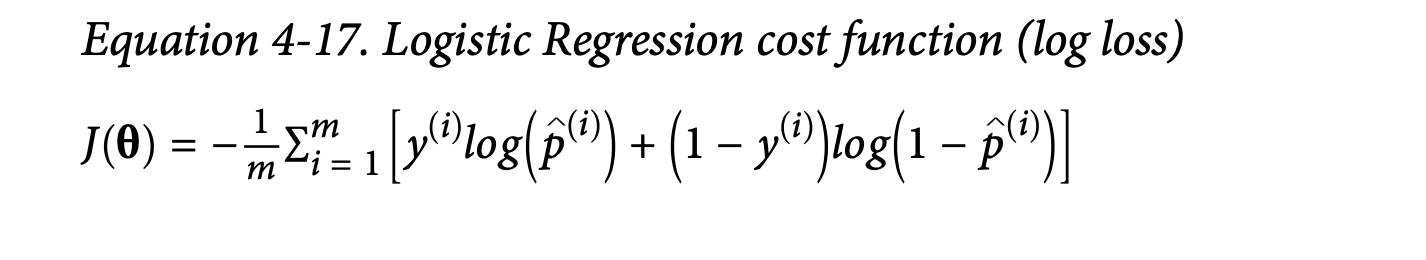

### Decision Boundaries
* **Let's use the iris dataset to illstrate the Logistic Regression**

In [41]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [32]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

**Train a Logistic Regression model**

In [34]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Let's look at the model's estimated probabilities for flowers with petal widths varying from 0 to 3cm**

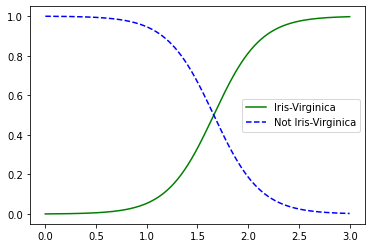

In [39]:
import matplotlib.pyplot as plt

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.legend()
plt.show()

* **There is a *decision boundary* at around 1.6 cm where both probabilites are equal to 50%: if the petal width is higher than 1.6cm, the classifier will predict that the flower is an Iris-Virginica, or else it will predict it is not**

In [40]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

* **Just like the other linear models, Logistic Regression models can be regularized using $\mathcal{l}_1$ or $\mathcal{l}_2$ penalties**
    * **The hyperparameter controlling the regularization strength of a** LogisticRegression **model is not** alpha, **but its inverse:** C
        * **The higher the value of** C, **the less the model is regularized**

### Softmax Regression
* **The logistic regression model can be generalized to support multiple calsses directly, without having to train and combine multiple binary classifiers**
    * **This is called** Softmax Regression, **or** Multinomial Logistic Regression

**When given an instance** $\pmb{x}$, **the Softmax Regression model first computes a score $s_k(\pmb{x})$ for each class k, then estimates the probability of each class by applying the *softmax function***

* **The equation to compute** $s_k(\pmb{x})$ **is**

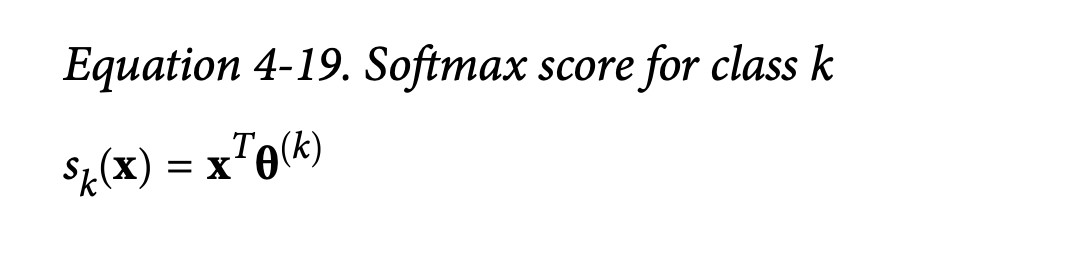

* **Note that each class has its own dedicated parameter vector $\pmb{\theta)}^{(k)}.$**
* **Once you have computed the score of every calss for the instance $\pmb{x}$, you can estiamte the probability $\hat{p}_k$ that the instance belongs to class $k$ by running the scores trhough the softmax function:**

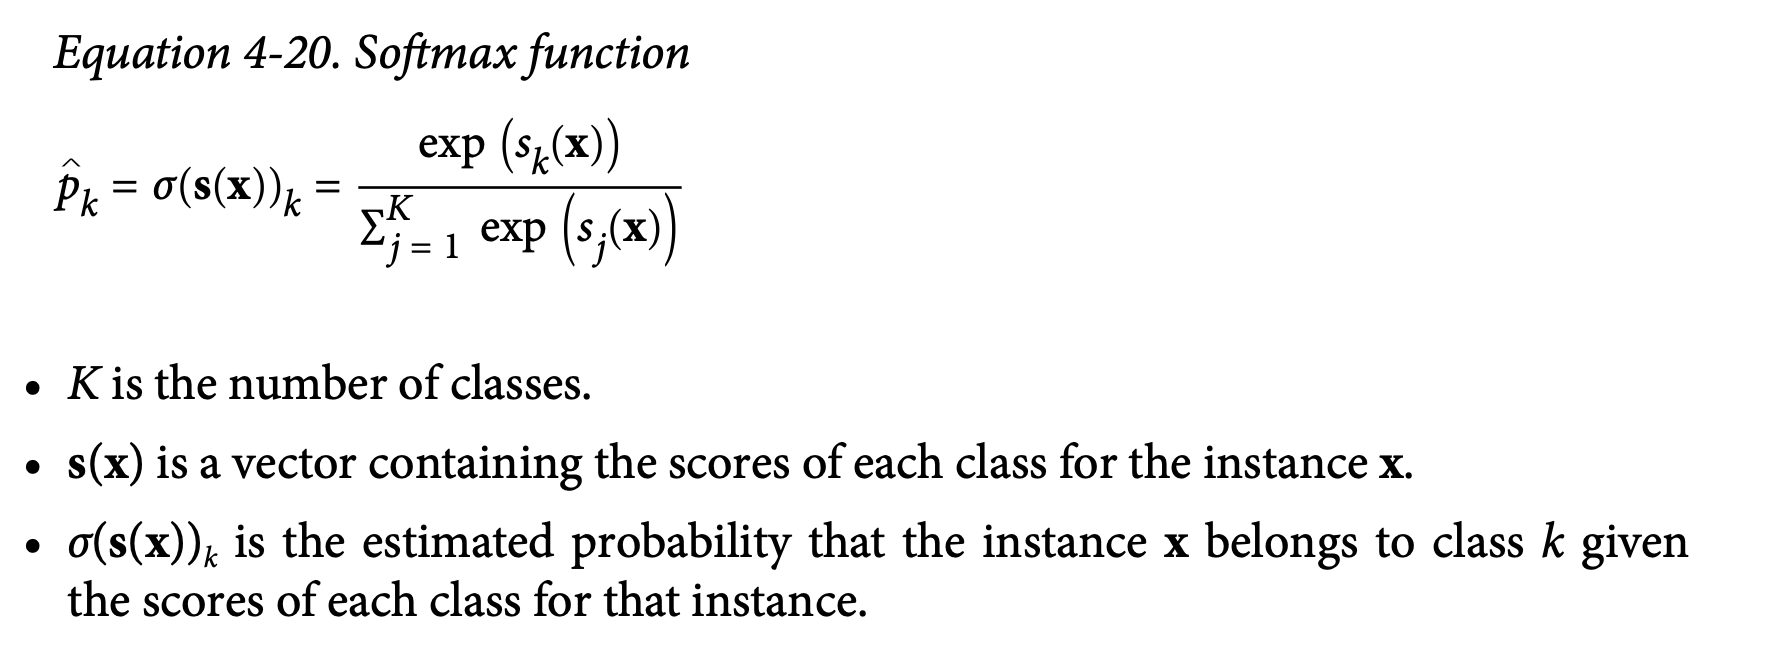

* **The softmax function compute the exponential of every score, then normalizes thme(dividing the sum of all the exponentials).**
* **The scores are generally called logits or log-odds(although they are actually unnormalized log-odds)**

* **The Softmax Regression classifier predicts the class with the highest probability (which is simply the class with the highest score)**

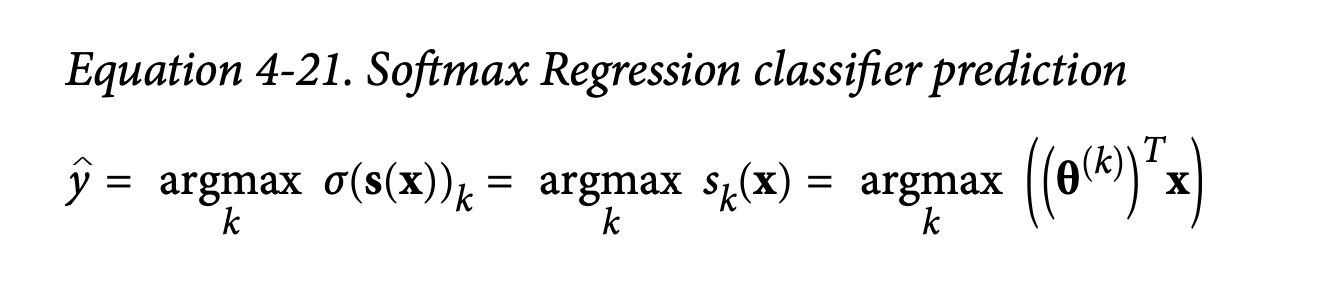

* **The** argmax **operator returns the value of a variable that maximizes a function. In this equation, it returns the value of k that maximizes the estimated probability $\sigma(\pmb{s(x)})_kx$**

##### Training Softmax Regression
* **The objective is to have a model that estimates a high probability for the target class(and consequently a low probability for the other classes)**
* **Minimizing the cost function, called the *cross entropy*, should lead to this objective because it penalizes the model when it estimates a low probability for a target class**
    * **Cross entropy is frequently used to measure how well a set of estimated class probabilities match the target classes**


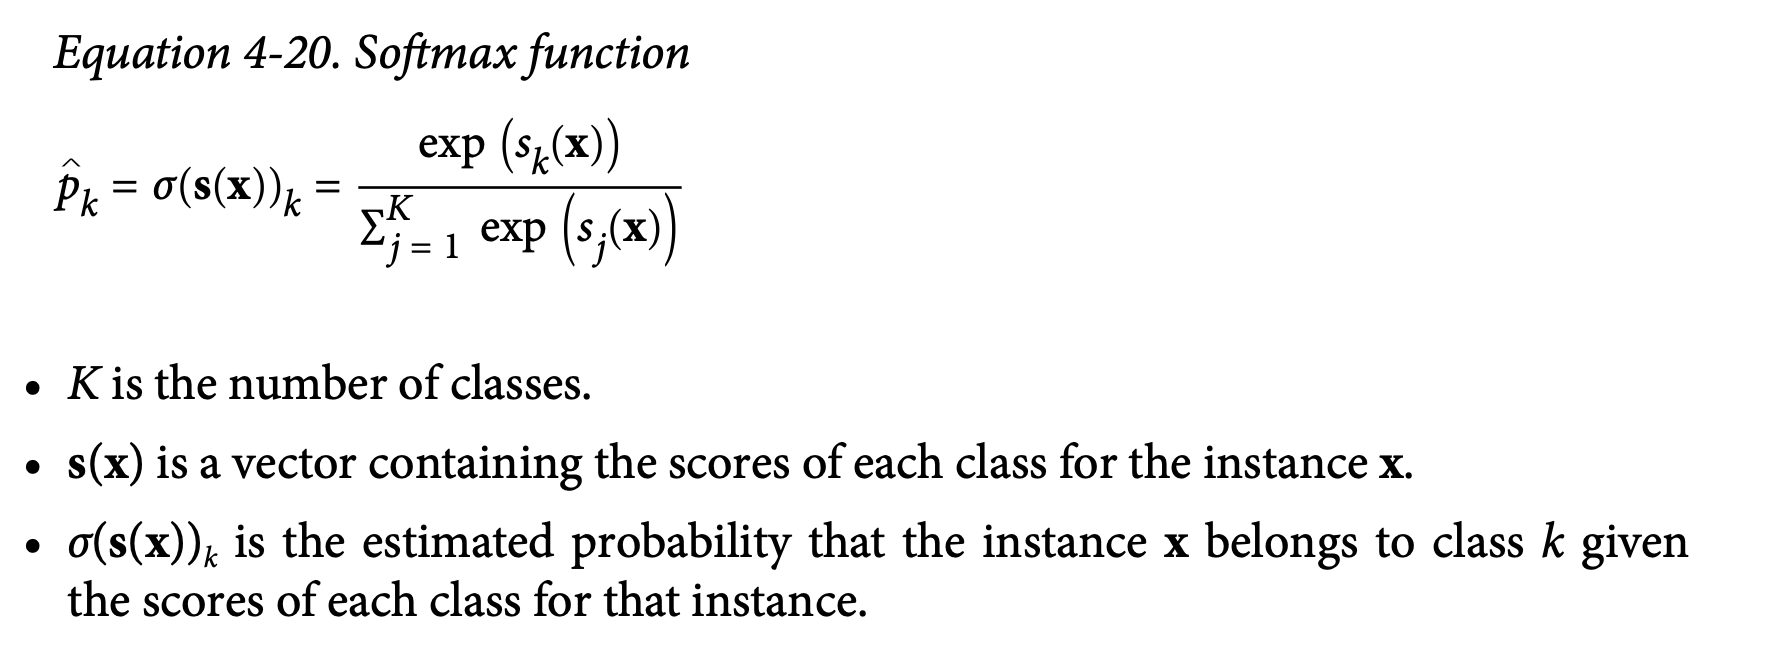

* **Notice that when there are just two classes(K=2), this cost functioon is equivalent to the Logistic Regression's cost function**

**Gradient vector of the cost function**

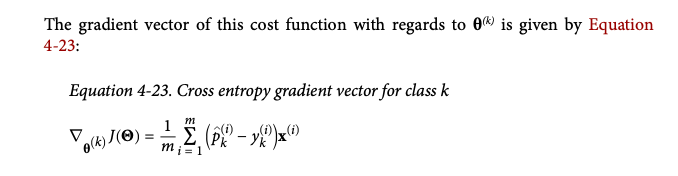

**Now you can compute the gradient vector of every class, then use Gradient Descent to find the paramter matrix that minimizes the cost function.**

**Now, let's use Softmax Regression to classify the iris flowers into all three classes.**
    * **SK-Learn's** LogisticRegression **uses one-versus-all by default when you train it on more than two clases, but you can set the** multi\_class **hyperparameter to** "multinomial" **to switch it to Softmax Regression instead**

In [43]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
softmax_reg.predict([[5, 2]])

array([2])

In [45]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])